# Vanilla DQN + LSTM

In [1]:
%load_ext autoreload
%autoreload 2

In [21]:
import matplotlib.pyplot as plt
import gym
import numpy as np
import torch
import torch.nn as nn
import torch.nn.functional as F


from src.utils.Config import Config
from src.utils.Logging import Logger
from src.components.memory import ReplayBuffer

from src.utils.misc import train, watch

In [55]:
def hidden_init(layer):
  fan_in = layer.weight.data.size()[0]
  lim = 1. / np.sqrt(fan_in)
  return (-lim, lim)

class QNetwork(nn.Module):
  def __init__(self, state_size, action_size, seed, fc1_units=64, fc2_units=64):
    # Call inheritance
    super(QNetwork, self).__init__()
    self.seed = torch.manual_seed(1234)


    
    self.layer_size=512
    self.layers=1
    self.hidden=64
    self.lstm = nn.LSTM(state_size, self.layer_size, self.layers)
    
    self.fc1 = nn.Linear(self.layer_size, fc1_units)

    self.bn1 = nn.BatchNorm1d(fc1_units)

    self.fc2 = nn.Linear(fc1_units, fc2_units)
    self.fc3 = nn.Linear(fc2_units, action_size)
    self.reset_parameters()
    

  def reset_parameters(self):
    self.fc1.weight.data.uniform_(*hidden_init(self.fc1))
    self.fc2.weight.data.uniform_(*hidden_init(self.fc2))
    self.fc3.weight.data.uniform_(-3e-3, 3e-3)

  def forward(self, state):
    state, h = self.lstm(state.unsqueeze(0))
    state = state.view(-1, self.layer_size)

    x = F.relu(self.fc1(state))
    x = F.relu(self.fc2(x))
    x = self.fc3(x)
    
    return x


In [56]:
config = Config()

config.env = gym.make('CartPole-v1')

config.win_condition = 195.0
config.memory = ReplayBuffer
config.model = QNetwork
config.double_dqn = True
config.print_config()

logger = Logger(config)

Agent Configuration:
env: 		EnvSpec(CartPole-v1)
win condition: 	195.0
device: 	cpu
seed: 		123456789
n_episodes: 	2000
max_t: 		1000
eps_start: 	1.0
eps_end: 	0.01
eps_decay: 	0.995
eps_greedy: 	True
noisy: 		False
tau: 		0.001
gamma: 		0.99
lr: 		0.0005
memory: 	<class 'src.components.memory.ReplayBuffer'>
batch_size: 	64
buffer_size: 	100000
lr_annealing: 	False
learn_every: 	4
double_dqn: 	True
model: 		<class '__main__.QNetwork'>
save_loc: 	None
<_sre.SRE_Match object; span=(0, 20), match='EnvSpec(CartPole-v1)'>
Logging at: logs/CartPole-v1/experiment-2020-09-03_21_39_18


In [57]:
train(config, logger)

Epi: 100	 Frame: 2243	Average Score: 22.4300	Mean: 12.0000	Duration: 0.13	#t_s: 11.0
Epi: 200	 Frame: 3666	Average Score: 14.2300	Mean: 12.0000	Duration: 0.14	#t_s: 11.0
Epi: 300	 Frame: 4958	Average Score: 12.9200	Mean: 12.0000	Duration: 0.13	#t_s: 11.0
Epi: 400	 Frame: 6082	Average Score: 11.2400	Mean: 10.0000	Duration: 0.09	#t_s: 9.0
Epi: 500	 Frame: 7164	Average Score: 10.8200	Mean: 11.0000	Duration: 0.16	#t_s: 10.0
Epi: 600	 Frame: 8211	Average Score: 10.4700	Mean: 10.0000	Duration: 0.08	#t_s: 9.0
Epi: 700	 Frame: 9295	Average Score: 10.8400	Mean: 9.0000	Duration: 0.08	#t_s: 8.0
Epi: 800	 Frame: 10459	Average Score: 11.6400	Mean: 10.0000	Duration: 0.08	#t_s: 9.0
Epi: 900	 Frame: 11732	Average Score: 12.7300	Mean: 9.0000	Duration: 0.12	#t_s: 8.0
Epi: 1000	 Frame: 13295	Average Score: 15.6300	Mean: 23.0000	Duration: 0.23	#t_s: 22.0
Epi: 1100	 Frame: 20203	Average Score: 69.0800	Mean: 282.0000	Duration: 10.22	#t_s: 281.0
Epi: 1147	 Frame: 34293 	Average: 196.3900	Mean: 265.0000	Durat

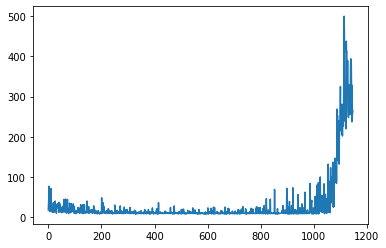

In [58]:
plt.plot(logger.score)

In [60]:
watch(config, logger.log_file_path)